### Exploratory Data Analysis 
#### 2. Quality Assurance (QA)

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("train1.csv")
train.shape

(21201, 29)

In [7]:
train.head(10)

,order_no,user_id,vehicle_type,platform_type,customer_type,plac_day_of_month,plac_weekday,plac_time,conf_day_of_month,conf_weekday,...,arrival_des_time,distance_km,Temperature,precipitation,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214
5,Order_No_7408,User_Id_1342,Bike,3,Business,14,5,3:07:35 PM,14,5,...,4:23:41 PM,9,27.2,NaN,-1.302583,36.767081,-1.257309,36.806008,Rider_Id_124,3191
6,Order_No_22680,User_Id_2803,Bike,3,Business,9,5,9:33:45 AM,9,5,...,10:19:45 AM,5,20.3,NaN,-1.279395,36.825364,-1.276574,36.851365,Rider_Id_114,1380
7,Order_No_21578,User_Id_1075,Bike,3,Business,11,1,2:13:01 PM,11,1,...,2:33:26 PM,3,28.7,NaN,-1.252796,36.800313,-1.255189,36.782203,Rider_Id_913,646
8,Order_No_5234,User_Id_733,Bike,3,Business,30,2,11:10:44 AM,30,2,...,1:19:35 PM,9,NaN,NaN,-1.255189,36.782203,-1.300255,36.825657,Rider_Id_394,3398
9,Order_No_1768,User_Id_2112,Bike,3,Business,23,5,4:48:54 PM,23,5,...,6:31:57 PM,14,24.6,NaN,-1.225322,36.808550,-1.215601,36.891686,Rider_Id_660,3439


In [6]:
train.dtypes

order_no                        object
user_id                         object
vehicle_type                    object
platform_type                    int64
customer_type                   object
plac_day_of_month                int64
plac_weekday                     int64
plac_time                       object
conf_day_of_month                int64
conf_weekday                     int64
conf_time                       object
arrival_pickup_day_of_month      int64
arrival_pickup_weekday           int64
arrival_pickup_time             object
pickup_day_of_month              int64
pickup_weekday                   int64
pickup_time                     object
arrival_des_day_of_month         int64
arrival_des_weekday              int64
arrival_des_time                object
distance_km                      int64
Temperature                    float64
precipitation                  float64
pickup_lat                     float64
pickup_long                    float64
destination_lat          

Checking for duplicates


In [4]:
train[train.duplicated()].shape

(0, 29)

Checking the frequency distributions of our categorical variables.

In [8]:
train.vehicle_type.value_counts(normalize=True)

Bike    1.0
Name: vehicle_type, dtype: float64

In [9]:
train.platform_type.value_counts(normalize=True)

3    0.851564
1    0.101269
2    0.046224
4    0.000943
Name: platform_type, dtype: float64

In [10]:
train.customer_type.value_counts(normalize=True)

Business    0.819961
Personal    0.180039
Name: customer_type, dtype: float64

#### Missing Values


In [12]:
train.isnull().sum() / train.shape[0]

order_no                       0.000000
user_id                        0.000000
vehicle_type                   0.000000
platform_type                  0.000000
customer_type                  0.000000
plac_day_of_month              0.000000
plac_weekday                   0.000000
plac_time                      0.000000
conf_day_of_month              0.000000
conf_weekday                   0.000000
conf_time                      0.000000
arrival_pickup_day_of_month    0.000000
arrival_pickup_weekday         0.000000
arrival_pickup_time            0.000000
pickup_day_of_month            0.000000
pickup_weekday                 0.000000
pickup_time                    0.000000
arrival_des_day_of_month       0.000000
arrival_des_weekday            0.000000
arrival_des_time               0.000000
distance_km                    0.000000
Temperature                    0.205934
precipitation                  0.973963
pickup_lat                     0.000000
pickup_long                    0.000000


Notice that the Temprature and the Precipitation columns have missing values. Since the missing values in the precipitation columns is more than 90%, we need to drop that column

In [14]:
conda install -c conda-forge missingno

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\simpl\anaconda3

  added / updated specs:
    - missingno



Note: you may need to restart the kernel to use updated packages.The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py39hcbf5309_1         1.0 MB  conda-forge




==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda





    missingno-0.4.2            |             py_1          12 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.0 MB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/noarch::missingno-0.4.2-py_1
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.12.0-py39haa95532_0 --> conda-forge::conda-4.13.0-py39hcbf5309_1




python_abi-3.9       | 4 KB      |            |   0% 
python_abi-3.9       | 4 KB      | ########## | 100% 
python_abi-3.9       | 4 KB      | ########## | 100% 

missingno-0.4.2      | 12 KB     |            |   0% 
missingno-0.4.2      | 12 KB     | ########## | 100% 
missingno-0.4.2      | 12 KB     | ########## | 100% 

conda-4.13.0         | 1.0 MB    |            |   0% 
conda-4.1

<AxesSubplot:>

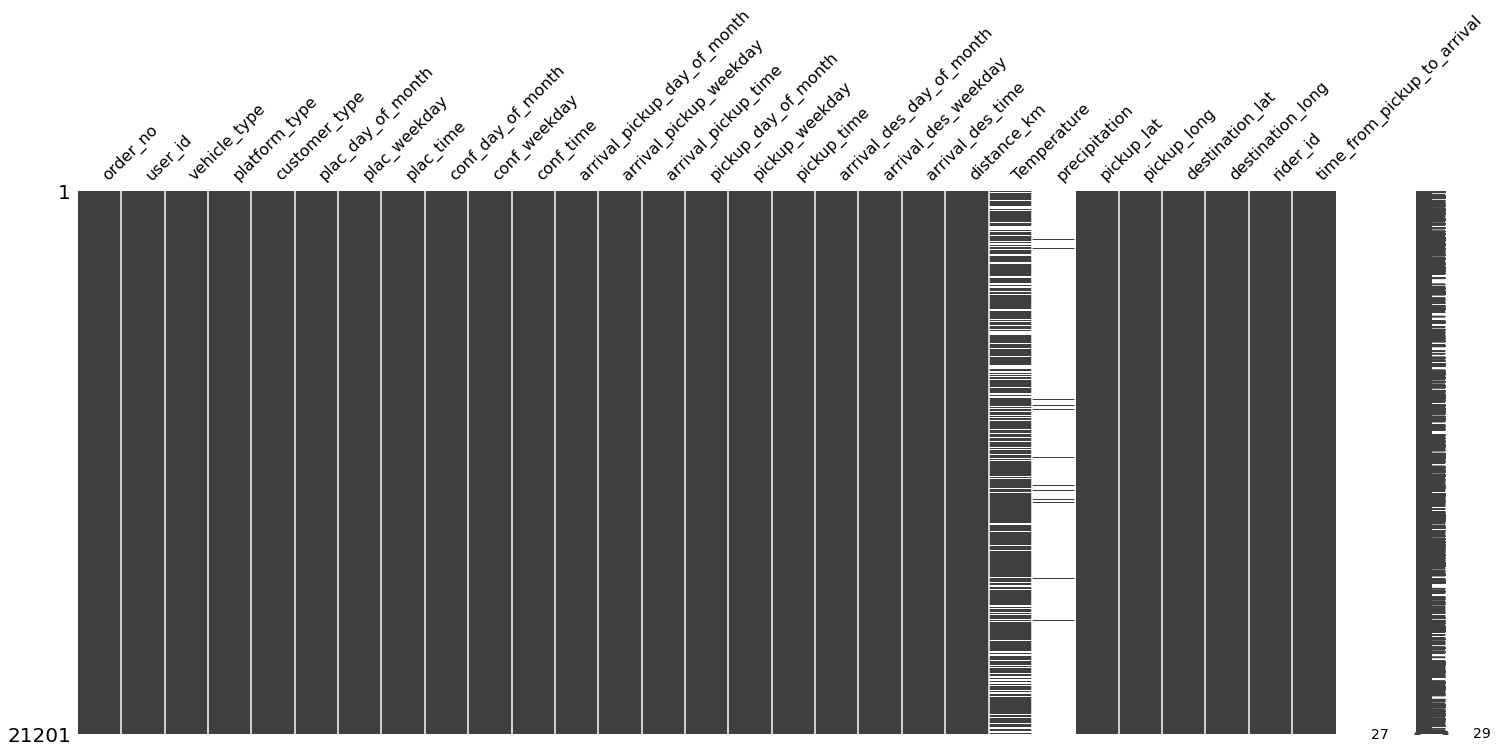

In [15]:
import missingno as msno
msno.matrix(train)

In [17]:
## dropping the columns witht the missing values
train.drop(columns="precipitation", inplace=True)

In [18]:
# imputing the temprature col
train.Temperature.fillna(train.Temperature.mean(), inplace=True)

In [19]:
train.describe()

,platform_type,plac_day_of_month,plac_weekday,conf_day_of_month,conf_weekday,arrival_pickup_day_of_month,arrival_pickup_weekday,pickup_day_of_month,pickup_weekday,arrival_des_day_of_month,arrival_des_weekday,distance_km,Temperature,pickup_lat,pickup_long,destination_lat,destination_long,time_from_pickup_to_arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.222006,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.400000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.258889,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.300000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


#### Conclusion 
- There are no  duplicate rows in the data
- The variables Temprature,and Preciptation have missing values. Precipitation has been removed from the dataset.

In [20]:
train.to_csv("train2.csv", index=False)